# 4. Mushroom foraging

The [mushroom dataset](https://www.kaggle.com/datasets/dhinaharp/mushroom-dataset) contains data about approximately 60000 mushrooms, and your task is to classify them as either edible or poisonous. You can read about the features [here](https://www.kaggle.com/datasets/uciml/mushroom-classification) and import the data using:

In [238]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', 1000)
df = pd.read_csv('secondary_data.csv', delimiter = ';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


It's up to you how you approach this data, but at a minimum, your analysis should include:

* Informed **data preparation**.
* 2 different classification models, one of which must be **logistic regression**.
* A discussion of which **performance metric** is most relevant for the evaluation of your models.
* 2 different **validation methodologies** used to tune hyperparameters.
* **Confusion matrices** for your models, and associated comments.

In [129]:
# Dropping all the columns that have above 25% of missing data 
trimmed_data = df.drop(labels = ["veil-type", "spore-print-color", "veil-color", "stem-root", "stem-surface", "gill-spacing"], axis = 1)
trimmed_data

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,3.56,5.44,y,f,f,d,u


In [240]:
#Fill out the missing NaN and equal 0 values in the rest of the columns

imputed_data = trimmed_data.copy()
imputed_data['cap-surface'] = imputed_data['cap-surface'].fillna(imputed_data['cap-surface'].value_counts().index[0])
imputed_data['gill-attachment'] = imputed_data['gill-attachment'].fillna(imputed_data['gill-attachment'].value_counts().index[0])
imputed_data['ring-type'] = imputed_data['ring-type'].fillna(imputed_data['ring-type'].value_counts().index[0])

for col in ['stem-width', 'stem-height', 'cap-diameter']:
    imputed_data[col] = imputed_data[col].replace(0, np.nan)
    imputed_data[col] = imputed_data[col].fillna(imputed_data[col].mean())

imputed_data


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,3.93,6.22,y,f,f,d,a
61065,p,1.27,f,s,y,f,f,f,3.18,5.43,y,f,f,d,a
61066,p,1.27,s,s,y,f,f,f,3.86,6.37,y,f,f,d,u
61067,p,1.24,f,s,y,f,f,f,3.56,5.44,y,f,f,d,u


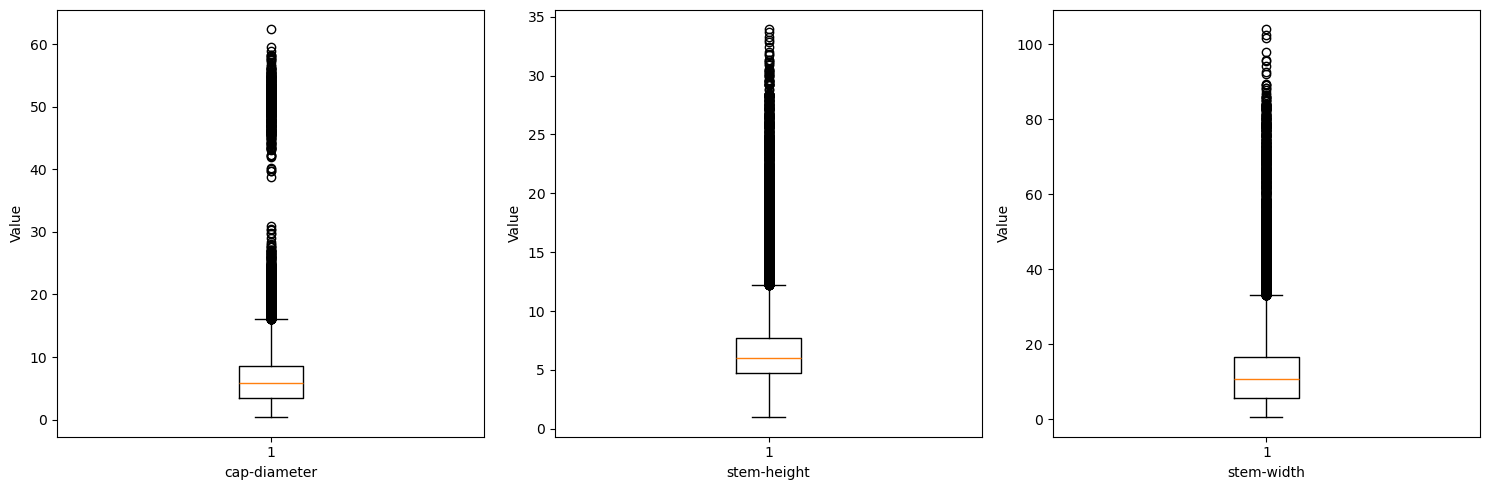

In [146]:
num_features = ['cap-diameter', 'stem-height', 'stem-width']
fig, axes = plt.subplots(1, len(num_features), figsize=(15, 5), sharey=False)
for ax, col in zip(axes, num_features):
    ax.boxplot(imputed_data[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Value')
plt.tight_layout()
plt.show()

In [ ]:
# We can see a lot of outliers, which is correct when working  with biological data like mushrooms. A lot of mushrooms have unusual sizes and features
# which can be seen on boxplots above

In [244]:
# Transform and scale the data
transformed_data = imputed_data.copy()
transformed_data['log(cap-diameter)'] = np.log(transformed_data['cap-diameter'])
transformed_data['log(stem-height)'] = np.log(transformed_data['stem-height'])
transformed_data['log(stem-width)'] = np.log(transformed_data['stem-width'])
transformed_data = transformed_data.drop(labels = ["cap-diameter"], axis = 1)
transformed_data = transformed_data.drop(labels = ["stem-height"], axis = 1)
transformed_data = transformed_data.drop(labels = ["stem-width"], axis = 1)
scaled_data = transformed_data.copy()

# Combine columns with mushroom metrics into a single column as a mushroom volume
scaled_data['log_mushroom_volume'] = (
    scaled_data['log(cap-diameter)'] +
    scaled_data['log(stem-height)'] +
    scaled_data['log(stem-width)'])

scaled_data.drop(columns=['log(cap-diameter)', 'log(stem-height)', 'log(stem-width)'], inplace=True)

# Scale our mushroom volume 
scaler = StandardScaler()
columns_to_scale = ['log_mushroom_volume']
scaled_data[columns_to_scale] = scaler.fit_transform(scaled_data[columns_to_scale])
scaled_data

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-color,has-ring,ring-type,habitat,season,log_mushroom_volume
0,p,x,g,o,f,e,w,w,t,g,d,w,1.522885
1,p,x,g,o,f,e,w,w,t,g,d,u,1.638008
2,p,x,g,o,f,e,w,w,t,g,d,w,1.525716
3,p,f,h,e,f,e,w,w,t,p,d,w,1.403667
4,p,x,h,o,f,e,w,w,t,p,d,w,1.489283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,s,s,y,f,f,f,y,f,f,d,a,-1.288023
61065,p,f,s,y,f,f,f,y,f,f,d,a,-1.441127
61066,p,s,s,y,f,f,f,y,f,f,d,u,-1.243693
61067,p,f,s,y,f,f,f,y,f,f,d,u,-1.390399


In [246]:
# Encode the data

# True/falses into booleans
encoded_data = scaled_data.copy()
encoded_data['Poisonous'] = pd.get_dummies(encoded_data['class'], dtype=float)['p']
encoded_data['Ring'] = pd.get_dummies(encoded_data['has-ring'], dtype=float)['t']
encoded_data['Bruise-or-bleed'] = pd.get_dummies(encoded_data['does-bruise-or-bleed'], dtype=float)['t']

# Divide chars into seperate boolean collumns
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['cap-shape'], prefix='cap-shape' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['cap-surface'], prefix='cap-surface' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['cap-color'], prefix='cap-color' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['gill-attachment'], prefix='gill-attachment' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['gill-color'], prefix='gill-color' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['stem-color'], prefix='stem-color' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['ring-type'], prefix='ring-type' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['habitat'], prefix='habitat' ,dtype=float)], axis = 1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(encoded_data['season'], prefix='season' ,dtype=float)], axis = 1)

encoded_data = encoded_data.drop(labels = ['class', 'has-ring', 'does-bruise-or-bleed', 'cap-shape', 'cap-surface', 'cap-color',
                                           'gill-attachment', 'gill-color', 'stem-color', 'ring-type', 'habitat', 'season'], axis = 1)
encoded_data

,log_mushroom_volume,Poisonous,Ring,Bruise-or-bleed,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,cap-surface_d,cap-surface_e,cap-surface_g,cap-surface_h,cap-surface_i,cap-surface_k,cap-surface_l,cap-surface_s,cap-surface_t,cap-surface_w,cap-surface_y,cap-color_b,cap-color_e,cap-color_g,cap-color_k,cap-color_l,cap-color_n,cap-color_o,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,gill-attachment_a,gill-attachment_d,gill-attachment_e,gill-attachment_f,gill-attachment_p,gill-attachment_s,gill-attachment_x,gill-color_b,gill-color_e,gill-color_f,gill-color_g,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stem-color_b,stem-color_e,stem-color_f,stem-color_g,stem-color_k,stem-color_l,stem-color_n,stem-color_o,stem-color_p,stem-color_r,stem-color_u,stem-color_w,stem-color_y,ring-type_e,ring-type_f,ring-type_g,ring-type_l,ring-type_m,ring-type_p,ring-type_r,ring-type_z,habitat_d,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,1.522885,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.638008,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.525716,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.403667,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.489283,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,-1.288023,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,-1.441127,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,-1.243693,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,

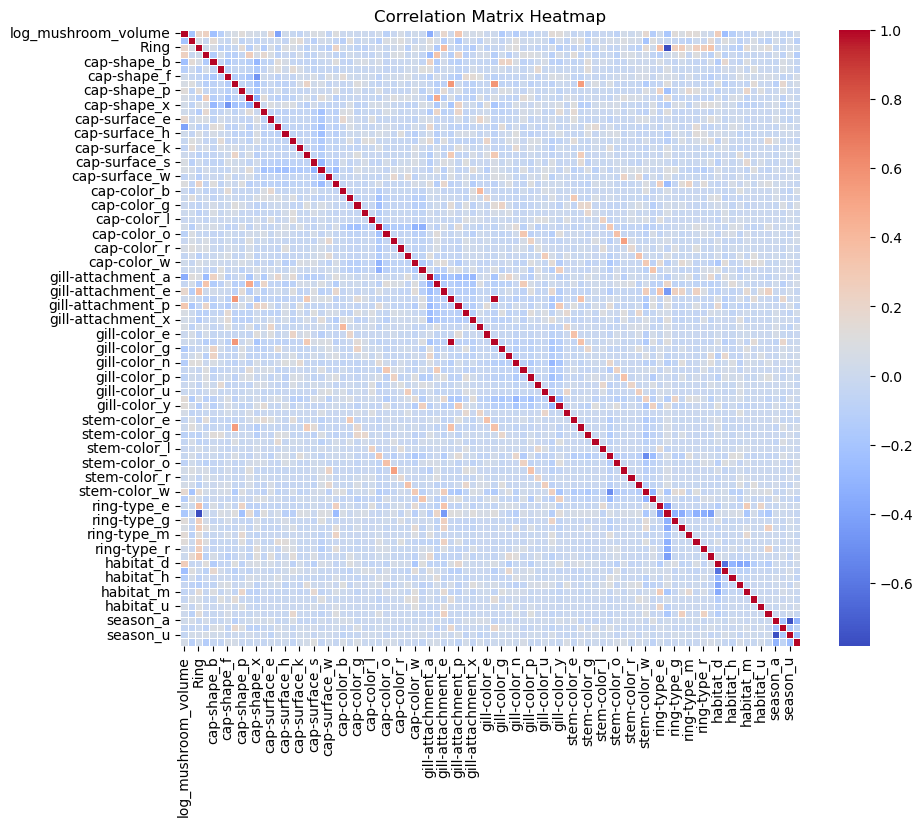

In [252]:
# Create a correlation matrix to check correlations of features
corr_matrix = encoded_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

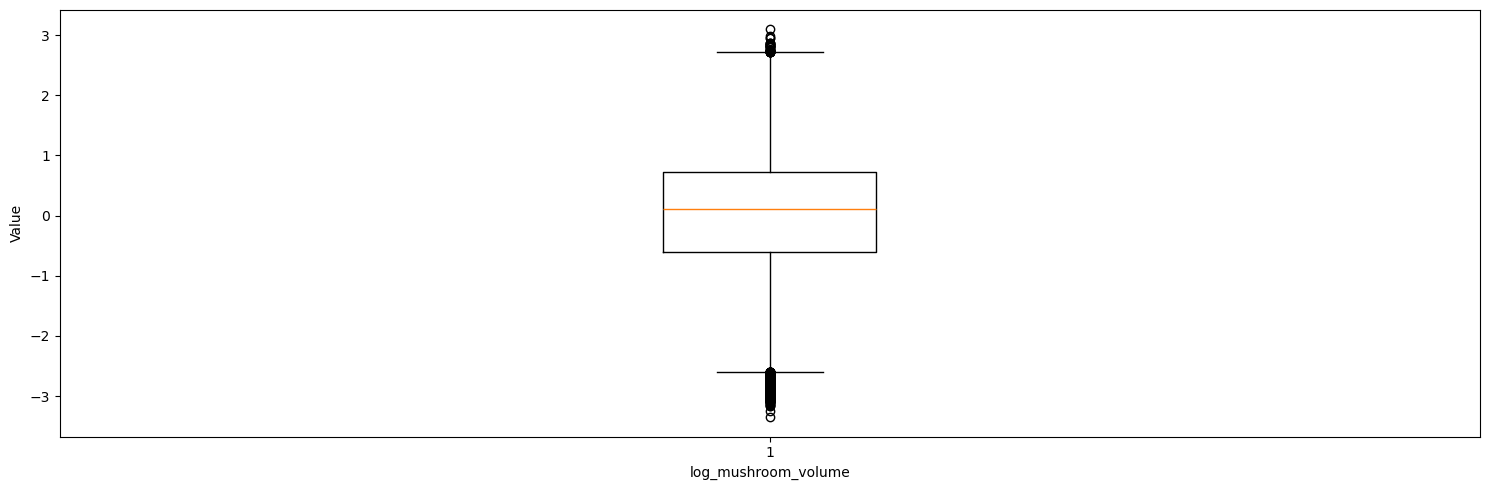

In [254]:
# Boxplot metric column
import matplotlib.pyplot as plt

num_feature = ['log_mushroom_volume']

fig, axes = plt.subplots(1, len(num_feature), figsize=(15, 5), sharey=False)

for ax, col in zip([axes], num_feature):
    ax.boxplot(encoded_data[col])
    ax.set_xlabel(col)
    ax.set_ylabel('Value')

plt.tight_layout()
plt.show()


In [232]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.xticks([0.5, 1.5], ["Edible", "Poisonous"])
    plt.yticks([0.5, 1.5], ["Edible", "Poisonous"])
    plt.show()

Decision Tree Classifier model accuracy :  99.29588996233831
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5436
         1.0       1.00      0.99      0.99      6778

    accuracy                           0.99     12214
   macro avg       0.99      0.99      0.99     12214
weighted avg       0.99      0.99      0.99     12214



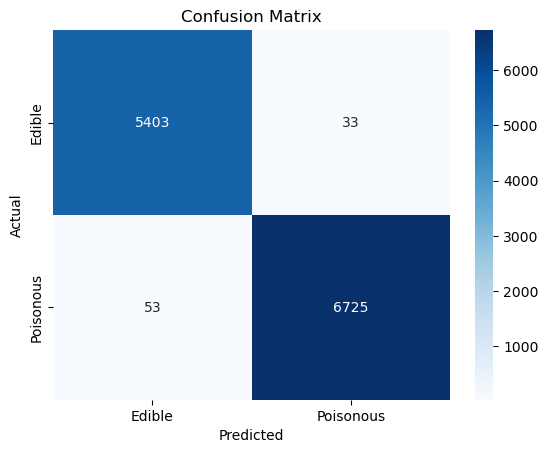

In [236]:
# 1st classification model: DecisionTreeClassifier
y = encoded_data["Poisonous"]
X = encoded_data.drop(columns=["Poisonous"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

dt_preds = decision_tree.predict(X_test)
dt_acc = accuracy_score(y_test, dt_preds)

print("Decision Tree Classifier model accuracy : " , dt_acc*100)
print(classification_report(y_test, dt_preds))
    
plot_confusion_matrix(y_test, dt_preds)


Logistic Regression model accuracy :  77.36204355657442
              precision    recall  f1-score   support

      Edible       0.75      0.74      0.74      5436
   Poisonous       0.79      0.80      0.80      6778

    accuracy                           0.77     12214
   macro avg       0.77      0.77      0.77     12214
weighted avg       0.77      0.77      0.77     12214



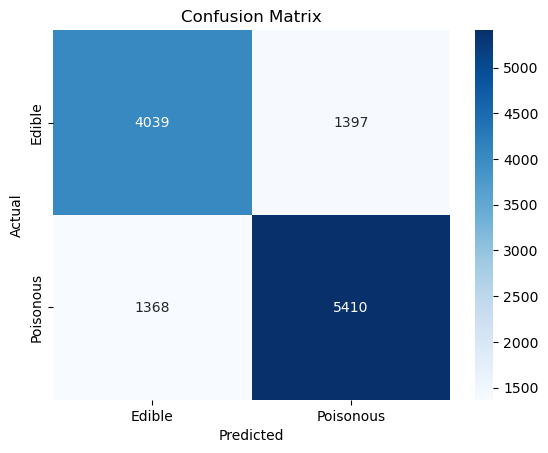

In [234]:
# 2nd Classification model: LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
lr_pred = logreg.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression model accuracy : " , lr_acc*100)
print(classification_report(y_test, lr_pred, target_names=["Edible", "Poisonous"]))
plot_confusion_matrix(y_test, lr_pred)